In [3]:
!module list

Currently Loaded Modulefiles:
  1) archive/2020-11       3) py-bluepysnap/0.6.1   5) py-efel/3.0.80
  2) python/3.7.4          4) py-bluepy/0.14.15     6) julia/1.5.2


In [1]:
!module list

Currently Loaded Modulefiles:
  1) archive/2020-11       3) py-bluepysnap/0.6.1   5) py-efel/3.0.80
  2) python/3.7.4          4) py-bluepy/0.14.15     6) julia/1.5.2


In [2]:
from bluepy.v2 import Simulation

import efel

from bluepy.v2 import Circuit
from bluepy.v2 import Cell
#from bluepy.v2.enums import Synapse

#from os import path

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import pickle as pkl

#import h5py

pd.set_option('display.max_columns', 500)

In [3]:
import matplotlib
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [4]:
c = Circuit('/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig')
mc2_cells = c.cells.get({'$target': 'mc2_Column'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.LAYER,Cell.MTYPE,Cell.ETYPE])
mc2gidsids = {k: v for k, v in enumerate(mc2_cells.index)}

mc2_cells_full = c.cells.get({'$target': 'mc2_Column'})

In [5]:
mc2_cells = mc2_cells.reset_index()

mc2_cells = mc2_cells.rename(columns = {'index':'gid'})

In [6]:
#glut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen1exc_outs_r_glut_2021022821.txt",sep='\t',header=None)
#gaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen1exc_outs_r_gaba_2021022821.txt",sep='\t',header=None)

#glut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/new50_ca1p25_gen_thal_outs_r_glut_2021031311.txt",sep='\t',header=None)
#gaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/new50_ca1p25_gen_thal_outs_r_gaba_2021031311.txt",sep='\t',header=None)

glut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/new_releases_ca1p25_gen_lin_outs_r_glut_2021031321.txt",sep='\t',header=None)
gaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/new_releases_ca1p25_gen_lin_outs_r_gaba_2021031321.txt",sep='\t',header=None)


glut.columns = ['idxm','c_gid','glut_releases_per_pre']
gaba.columns = ['idxm','c_gid','gaba_releases_per_pre']


#postglut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen1exc_ins_r_glut_2021022821.txt",sep='\t',header=None)
#postgaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen1exc_ins_r_gaba_2021022821.txt",sep='\t',header=None)

postglut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/new_releases_ca1p25_gen_lin_ins_r_glut_2021031321.txt",sep='\t',header=None)
postgaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/new_releases_ca1p25_gen_lin_ins_r_gaba_2021031321.txt",sep='\t',header=None)

postglut.columns = ['idxm','rank','c_gid','glut_releases_received_per_post']
postgaba.columns = ['idxm','rank','c_gid','gaba_releases_received_per_post']


In [7]:
releases_pre = pd.merge(glut,gaba,how='inner',on=['idxm','c_gid'])
releases_post = pd.merge(postglut,postgaba,how='inner',on=['idxm','c_gid'])

highreleases_all = pd.merge(releases_pre,releases_post,how='inner',on=['idxm','c_gid'])

In [8]:
glut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/atp1p2_releases_ca1p25_gen_lin_outs_r_glut_2021031321.txt",sep='\t',header=None)
gaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/atp1p2_releases_ca1p25_gen_lin_outs_r_gaba_2021031321.txt",sep='\t',header=None)


glut.columns = ['idxm','c_gid','glut_releases_per_pre']
gaba.columns = ['idxm','c_gid','gaba_releases_per_pre']

postglut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/atp1p2_releases_ca1p25_gen_lin_ins_r_glut_2021031321.txt",sep='\t',header=None)
postgaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/atp1p2_releases_ca1p25_gen_lin_ins_r_gaba_2021031321.txt",sep='\t',header=None)

postglut.columns = ['idxm','rank','c_gid','glut_releases_received_per_post']
postgaba.columns = ['idxm','rank','c_gid','gaba_releases_received_per_post']


In [9]:
releases_pre = pd.merge(glut,gaba,how='inner',on=['idxm','c_gid'])
releases_post = pd.merge(postglut,postgaba,how='inner',on=['idxm','c_gid'])

lowreleases_all = pd.merge(releases_pre,releases_post,how='inner',on=['idxm','c_gid'])

In [10]:
lowreleases_all['ATP'] = 'low'
highreleases_all['ATP'] = 'high'

In [11]:
releases_all = pd.concat([lowreleases_all,highreleases_all])
releases_all = releases_all.reset_index(drop=True)

In [12]:
releases_all = releases_all.drop(columns=['rank_x','rank_y'])

In [13]:
releases_all.head()

,idxm,c_gid,glut_releases_per_pre,gaba_releases_per_pre,glut_releases_received_per_post,gaba_releases_received_per_post,ATP
0,0,1800,785.0,0.0,119.0,57.0,low
1,0,2923,2094.0,0.0,431.0,79.0,low
2,0,7791,552.0,0.0,221.0,21.0,low
3,0,15573,1284.0,0.0,441.0,45.0,low
4,0,16175,1434.0,0.0,425.0,71.0,low


In [14]:
releases_all['idxm'].unique()  # !!! because if idxm % 10 == 0:  with open(

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [16]:
releases_all = releases_all.loc[releases_all['idxm']>0,:]

In [15]:
len(releases_all['c_gid'].unique())

22918

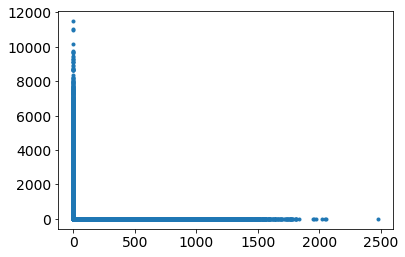

In [17]:
plt.plot(releases_all['glut_releases_per_pre'],releases_all['gaba_releases_per_pre'],'.')
plt.show()

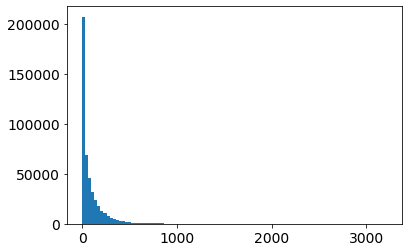

In [18]:
plt.hist(postglut['glut_releases_received_per_post'],bins = 100)
plt.show()

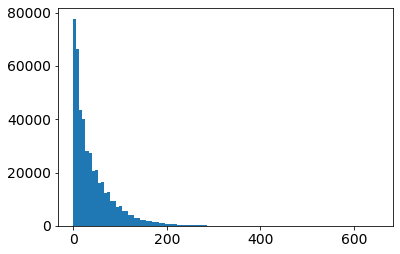

In [19]:
plt.hist(postgaba['gaba_releases_received_per_post'],bins = 100)
plt.show()

In [20]:
#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen1exc_param_2021022821.txt",header=None,sep = "\t") 
#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/new50_ca1p25_gen_thal_param_2021031311.txt",header=None,sep = "\t") 

lowparam = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/atp1p2_releases_ca1p25_gen_lin_param_2021031321.txt",header=None,sep = "\t") 

lowparam.columns = ['c_gid','rank','idxm',
                 'ina_density', 'const_ksi', 'voltages_per_gids', 'nais_mean', 'kis_mean', 
                 'ik_density', 'const41','pAKTPFK2', 'atpi_mean','atp_vm27','cais_mean','mito_scale','glutamatergic_gaba_scaling','outs_r_to_met','cells_volumes_um3']


In [21]:

highparam = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/new_releases_ca1p25_gen_lin_param_2021031321.txt",header=None,sep = "\t") 

highparam.columns = ['c_gid','rank','idxm',
                 'ina_density', 'const_ksi', 'voltages_per_gids', 'nais_mean', 'kis_mean', 
                 'ik_density', 'const41','pAKTPFK2', 'atpi_mean','atp_vm27','cais_mean','mito_scale','glutamatergic_gaba_scaling','outs_r_to_met','cells_volumes_um3']


In [22]:
lowparam['ATP'] = 'low'
highparam['ATP'] = 'high'

In [23]:
param = pd.concat([lowparam,highparam])
param = param.reset_index(drop=True)

In [26]:
releases_params = pd.merge(param,releases_all,how='inner',on=['idxm','c_gid','ATP'])

In [27]:
releases_params.head()

,c_gid,rank,idxm,ina_density,const_ksi,voltages_per_gids,nais_mean,kis_mean,ik_density,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,cells_volumes_um3,ATP,glut_releases_per_pre,gaba_releases_per_pre,glut_releases_received_per_post,gaba_releases_received_per_post
0,1079,145,1,-0.000097,0.06,-65.0,10.961239,138.429077,0.000716,4.1,0.17,0.676632,1.438316,0.000144,0.826873,0.1,1.234098e-06,4091.923811,low,76.0,0.0,9.0,1.0
1,16349,2296,1,0.000363,0.06,-65.0,11.393969,137.767159,0.000168,4.1,0.17,0.959522,1.579761,0.000162,0.826873,0.1,0.000000e+00,2978.623956,low,0.0,0.0,12.0,9.0
2,1898,267,1,0.000080,0.06,-65.0,10.781540,138.782932,0.000638,4.1,0.17,0.897718,1.548859,0.000136,0.826873,0.1,2.032458e-06,3563.431873,low,109.0,0.0,15.0,3.0
3,13905,1980,1,-0.000112,0.06,-65.0,10.704261,138.885554,0.000964,4.1,0.17,0.975281,1.587640,0.000116,0.826873,0.1,5.336405e-08,4980.520522,low,4.0,0.0,22.0,3.0
4,2048,285,1,-0.000369,0.06,-65.0,10.993697,138.460144,0.000751,4.1,0.17,0.728427,1.464214,0.000181,0.826873,0.1,4.101074e-06,3256.581877,low,201.0,0.0,17.0,8.0


In [28]:
releases_params = pd.merge(releases_params,mc2_cells.loc[:,['gid','synapse_class', 'layer', 'mtype', 'etype']],how='inner',left_on='c_gid',right_on='gid')

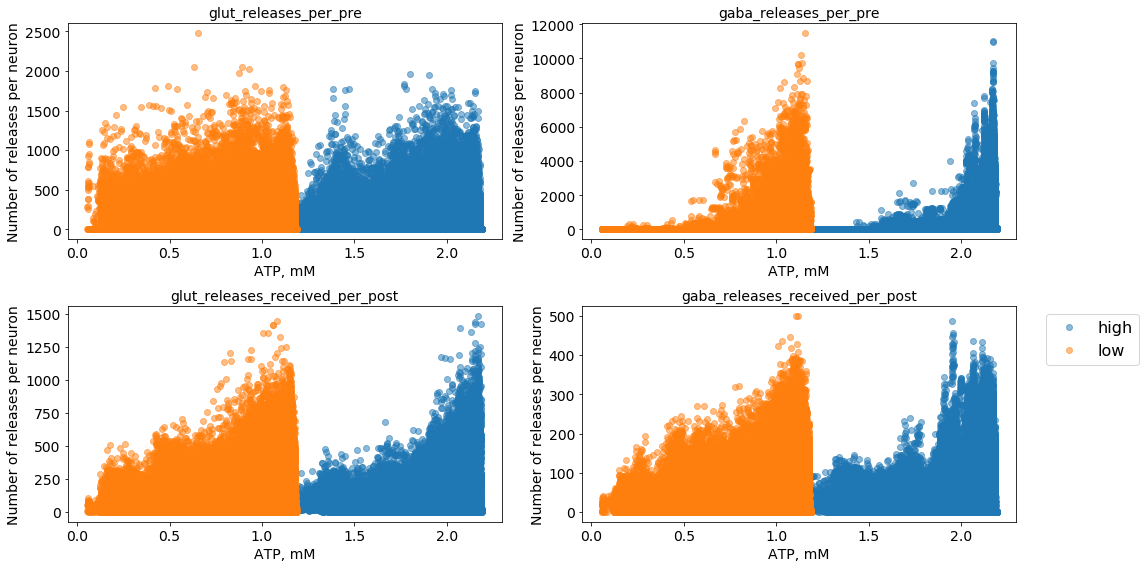

In [45]:
groups = releases_params.groupby('ATP')

fig, axs = plt.subplots(2,2,figsize=(16,8))

#ax.margins(0.05)

ys = ['glut_releases_per_pre','gaba_releases_per_pre','glut_releases_received_per_post','gaba_releases_received_per_post']

for idx,feature in enumerate(ys):

    x = idx % 2 
    y = idx // 2 
    
    for name, group in groups:
        axs[y, x].plot(group.loc[:,'atpi_mean'],group.loc[:,feature], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        
        axs[y, x].set_title(feature,fontsize=14)
        
    

for ax in axs.flat:
    ax.set_xlabel('ATP, mM',fontsize=14)
    ax.set_ylabel('Number of releases per neuron',fontsize=14)
    
axs[y,x].legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=16)

fig.tight_layout()


#fig.savefig('../plots/best/releases_14mar2021.pdf', dpi=300,bbox_inches='tight')
#fig.savefig('../plots/best/releases_14mar2021.png', dpi=300,bbox_inches='tight')


plt.show()

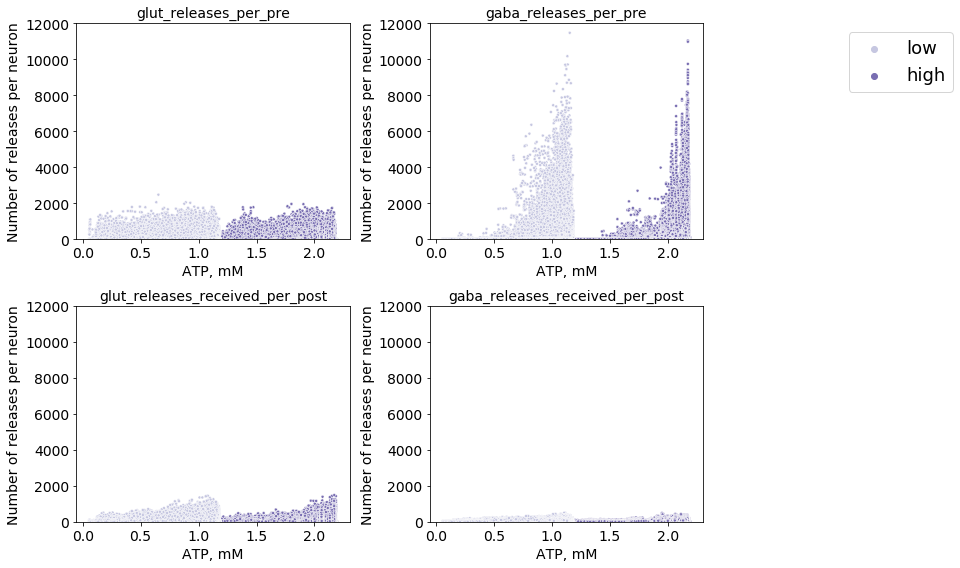

In [53]:
#groups = releases_params.groupby('ATP')

fig, axs = plt.subplots(2,2,figsize=(14,8))

#ax.margins(0.05)

ys = ['glut_releases_per_pre','gaba_releases_per_pre','glut_releases_received_per_post','gaba_releases_received_per_post']

for idx,feature in enumerate(ys):

    x = idx % 2 
    y = idx // 2 
    
    g = sns.scatterplot(data=releases_params, x="atpi_mean", y=feature, hue="ATP", ax = axs[y, x],palette='Purples',marker=".")

    g.set_title(feature,fontsize=14)
    g.set_ylim([0, 12000])

    

    for ax in axs.flat:
        ax.set_xlabel('ATP, mM',fontsize=14)
        ax.set_ylabel('Number of releases per neuron',fontsize=14)
    
    if feature != 'gaba_releases_per_pre':
        g.legend([],[], frameon=False)
    else:
        g.legend(bbox_to_anchor=(1.5, 1), loc='upper left',fontsize=18)
fig.tight_layout()


fig.savefig('plots/best/releases_sameylim_14mar2021.pdf', dpi=300,bbox_inches='tight')
fig.savefig('plots/best/releases_sameylim_14mar2021.png', dpi=300,bbox_inches='tight')


plt.show()

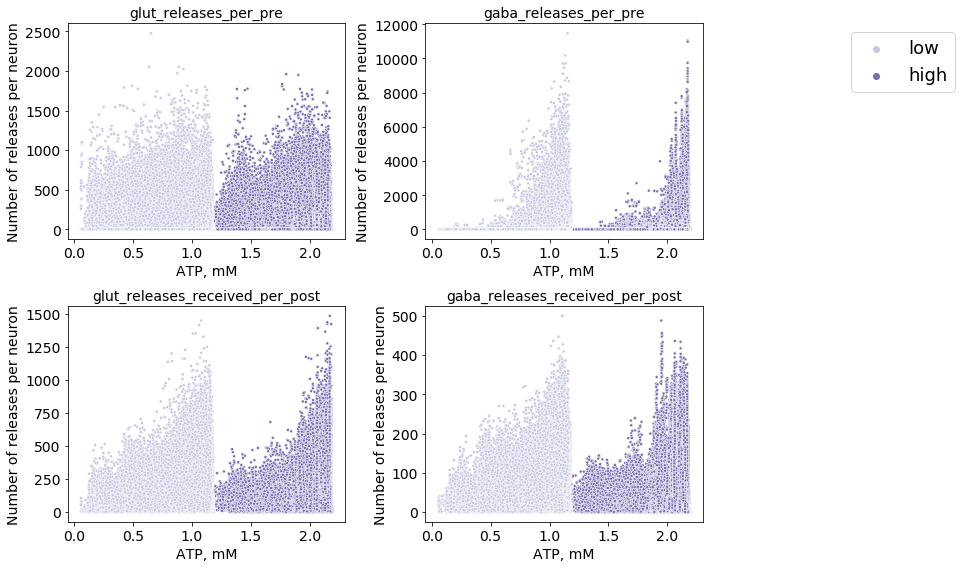

In [52]:
#groups = releases_params.groupby('ATP')

fig, axs = plt.subplots(2,2,figsize=(14,8))

#ax.margins(0.05)

ys = ['glut_releases_per_pre','gaba_releases_per_pre','glut_releases_received_per_post','gaba_releases_received_per_post']

for idx,feature in enumerate(ys):

    x = idx % 2 
    y = idx // 2 
    
    g = sns.scatterplot(data=releases_params, x="atpi_mean", y=feature, hue="ATP", ax = axs[y, x],palette='Purples',marker=".")

    g.set_title(feature,fontsize=14)
    #g.set_ylim([0, 12000])

    

    for ax in axs.flat:
        ax.set_xlabel('ATP, mM',fontsize=14)
        ax.set_ylabel('Number of releases per neuron',fontsize=14)
    
    if feature != 'gaba_releases_per_pre':
        g.legend([],[], frameon=False)
    else:
        g.legend(bbox_to_anchor=(1.5, 1), loc='upper left',fontsize=18)
fig.tight_layout()


fig.savefig('plots/best/releases_diffylim_14mar2021.pdf', dpi=300,bbox_inches='tight')
fig.savefig('plots/best/releases_diffylim_14mar2021.png', dpi=300,bbox_inches='tight')


plt.show()

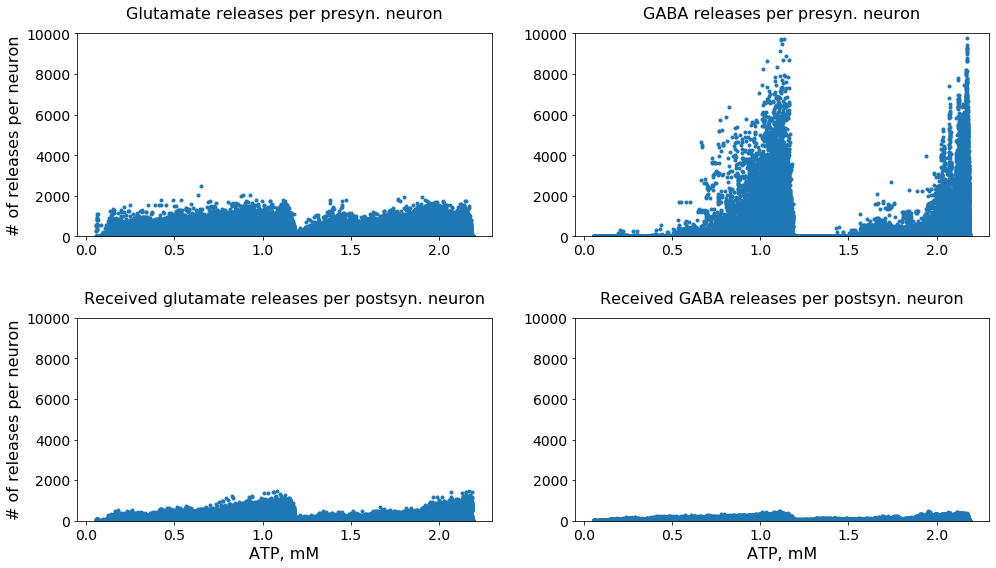

In [31]:
fig, axs = plt.subplots(2,2, figsize=(14,8))

ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]



ax1.plot(releases_params['atpi_mean'],releases_params['glut_releases_per_pre'],'.')
ax2.plot(releases_params['atpi_mean'],releases_params['gaba_releases_per_pre'],'.')
ax3.plot(releases_params['atpi_mean'],releases_params['glut_releases_received_per_post'],'.')
ax4.plot(releases_params['atpi_mean'],releases_params['gaba_releases_received_per_post'],'.')


#ax1.set_xlim([0, 2000])
#ax2.set_xlim([0, 2000])
#ax3.set_xlim([0, 2000])
#ax4.set_xlim([0, 2000])

ax1.set_ylim([0, 10000])
ax2.set_ylim([0, 10000])
ax3.set_ylim([0, 10000])
ax4.set_ylim([0, 10000])

#ax1.set_xlabel('ATP, mM',fontsize=16)
#ax2.set_xlabel('ATP, mM',fontsize=16)
ax3.set_xlabel('ATP, mM',fontsize=16)
ax4.set_xlabel('ATP, mM',fontsize=16)

ax1.set_ylabel('# of releases per neuron',fontsize=16)
#ax2.set_ylabel('# of releases per neuron',fontsize=16)
ax3.set_ylabel('# of releases per neuron',fontsize=16)
#ax4.set_ylabel('# of releases per neuron',fontsize=16)


ax1.set_title('Glutamate releases per presyn. neuron',fontsize=16, pad=15)
ax2.set_title('GABA releases per presyn. neuron',fontsize=16, pad=15)
ax3.set_title('Received glutamate releases per postsyn. neuron',fontsize=16, pad=15)
ax4.set_title('Received GABA releases per postsyn. neuron',fontsize=16, pad=15)



#ax.set_yticks([0, 10000, 20000])

plt.tight_layout()

plt.subplots_adjust(wspace=0.2, hspace=0.4)

#fig.savefig('plots/best/releases_vs_atp_12mar2021.pdf', dpi=300,bbox_inches='tight')
#fig.savefig('plots/best/releases_vs_atp_12mar2021.png', dpi=300,bbox_inches='tight')

plt.show()


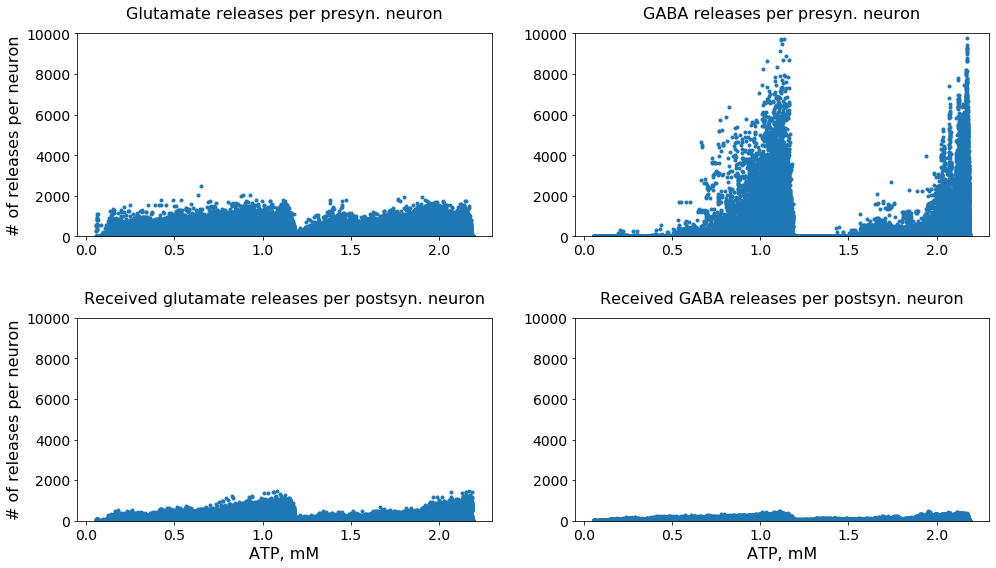

In [32]:
fig, axs = plt.subplots(2,2, figsize=(14,8))

ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]



ax1.plot(releases_params.loc[releases_params['idxm']>0,'atpi_mean'],releases_params.loc[releases_params['idxm']>0,'glut_releases_per_pre'],'.')
ax2.plot(releases_params.loc[releases_params['idxm']>0,'atpi_mean'],releases_params.loc[releases_params['idxm']>0,'gaba_releases_per_pre'],'.')
ax3.plot(releases_params.loc[releases_params['idxm']>0,'atpi_mean'],releases_params.loc[releases_params['idxm']>0,'glut_releases_received_per_post'],'.')
ax4.plot(releases_params.loc[releases_params['idxm']>0,'atpi_mean'],releases_params.loc[releases_params['idxm']>0,'gaba_releases_received_per_post'],'.')


#ax1.set_xlim([0, 2000])
#ax2.set_xlim([0, 2000])
#ax3.set_xlim([0, 2000])
#ax4.set_xlim([0, 2000])

ax1.set_ylim([0, 10000])
ax2.set_ylim([0, 10000])
ax3.set_ylim([0, 10000])
ax4.set_ylim([0, 10000])

#ax1.set_xlabel('ATP, mM',fontsize=16)
#ax2.set_xlabel('ATP, mM',fontsize=16)
ax3.set_xlabel('ATP, mM',fontsize=16)
ax4.set_xlabel('ATP, mM',fontsize=16)

ax1.set_ylabel('# of releases per neuron',fontsize=16)
#ax2.set_ylabel('# of releases per neuron',fontsize=16)
ax3.set_ylabel('# of releases per neuron',fontsize=16)
#ax4.set_ylabel('# of releases per neuron',fontsize=16)


ax1.set_title('Glutamate releases per presyn. neuron',fontsize=16, pad=15)
ax2.set_title('GABA releases per presyn. neuron',fontsize=16, pad=15)
ax3.set_title('Received glutamate releases per postsyn. neuron',fontsize=16, pad=15)
ax4.set_title('Received GABA releases per postsyn. neuron',fontsize=16, pad=15)



#ax.set_yticks([0, 10000, 20000])

plt.tight_layout()

plt.subplots_adjust(wspace=0.2, hspace=0.4)

#fig.savefig('plots/best/releases_vs_atp_12mar2021.pdf', dpi=300,bbox_inches='tight')
#fig.savefig('plots/best/releases_vs_atp_12mar2021.png', dpi=300,bbox_inches='tight')

plt.show()
